<a href="https://colab.research.google.com/github/haikalfitri/EMNIST/blob/main/Emnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jul 24 08:11:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

In [ ]:
print(list(uploaded))

['1.jfif']


In [ ]:
import shutil
import os
src = 'drive/MyDrive/emnist-balanced.mat'
dst =  'emnist-balanced.mat'
shutil.copyfile(src, dst)

'emnist-balanced.mat'

#Load Data

In [ ]:
from scipy import io as spio
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import numpy as np
import seaborn as sns

import pickle


data = spio.loadmat("emnist-balanced.mat")

x_train = data["dataset"][0][0][0][0][0][0]
y_train = data["dataset"][0][0][0][0][0][1]

x_test = data["dataset"][0][0][1][0][0][0]
y_test = data["dataset"][0][0][1][0][0][1]


In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

#Preprocess Data

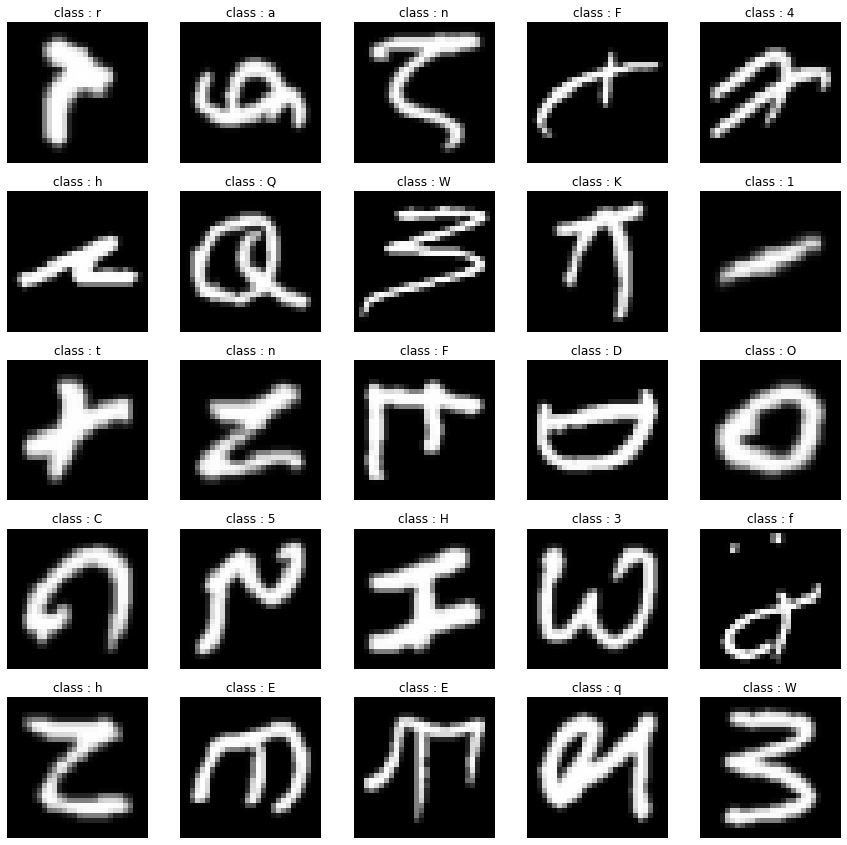

In [ ]:

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

f, ax = plt.subplots(5, 5, figsize = (15, 15))
for i in range(0,25):
    
    label = emnist[y_train[i][0]]
    ax[i//5, i%5].imshow(tf.squeeze(x_train[i]), cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("class : {}".format(label)) 
plt.show()

In [ ]:
import numpy as np
for i in range(x_train.shape[0]):
    x_train[i] = np.rot90(np.fliplr(x_train[i]))

for i in range(x_test.shape[0]):
    x_test[i] = np.rot90(np.fliplr(x_test[i]))

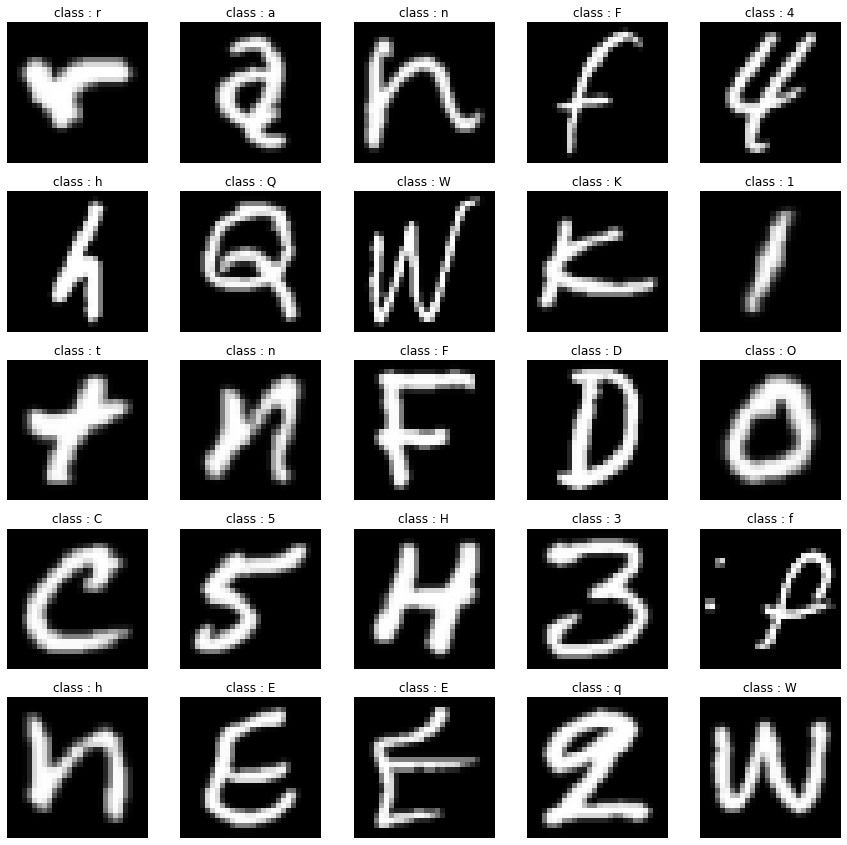

In [ ]:

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

f, ax = plt.subplots(5, 5, figsize = (15, 15))
for i in range(0,25):
    
    label = emnist[y_train[i][0]]
    ax[i//5, i%5].imshow(tf.squeeze(x_train[i]), cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("class : {}".format(label)) 
plt.show()

In [ ]:
#Normalize Data
x_train = x_train / 255
x_test = x_test / 255

#Image Augmentation 1

In [ ]:
data_generator1 = ImageDataGenerator(
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        zoom_range=.1)

#Image Augmentation 2

In [ ]:
data_generator2 = ImageDataGenerator(
                        fill_mode='nearest',
                        rotation_range=0.2,
                        zoom_range=.1)

#Reshape labels into categories

In [ ]:
y_train = keras.utils.to_categorical(y_train, 47)
y_test = keras.utils.to_categorical(y_test, 47)

#Design our Model

In [ ]:
model=Sequential()


model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(64,(3,3), activation='relu'))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

#Experiment 1

In [ ]:
epoch = 100
optimizer = 'adam'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
#history = model.fit(data_generator.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32, epochs=epoch, callbacks=[tensorboard])
    

Epoch 1/100
3525/3525 [==============================] - 54s 7ms/step - loss: 0.6389 - accuracy: 0.7913 - val_loss: 0.4786 - val_accuracy: 0.8354
Epoch 2/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.3853 - accuracy: 0.8609 - val_loss: 0.3995 - val_accuracy: 0.8636
Epoch 3/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.3342 - accuracy: 0.8774 - val_loss: 0.3726 - val_accuracy: 0.8682
Epoch 4/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.3022 - accuracy: 0.8862 - val_loss: 0.3867 - val_accuracy: 0.8651
Epoch 5/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.2748 - accuracy: 0.8939 - val_loss: 0.3664 - val_accuracy: 0.8755
Epoch 6/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.2550 - accuracy: 0.8993 - val_loss: 0.3686 - val_accuracy: 0.8778
Epoch 7/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.2374 - accuracy: 0.9057 - val_loss: 0.3726 -

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

588/588 [==============================] - 2s 4ms/step - loss: 2.5186 - accuracy: 0.8565


In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

Loss of the model (train data) is -  0.07641539722681046
Accuracy of the model (train data) is -  97.98049926757812 %

Loss of the model (validation data) is -  2.5185985565185547
Accuracy of the model (validation data) is -  85.65425276756287 %


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

#Experiment 2

In [ ]:
epoch = 100
optimizer = 'rmsprop'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
#history = model.fit(data_generator.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32, epochs=epoch, callbacks=[tensorboard])
    

Epoch 1/100
3525/3525 [==============================] - 30s 8ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 3.0548 - val_accuracy: 0.8655
Epoch 2/100
3525/3525 [==============================] - 27s 8ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 3.1810 - val_accuracy: 0.8652
Epoch 3/100
3525/3525 [==============================] - 28s 8ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 3.1701 - val_accuracy: 0.8614
Epoch 4/100
3525/3525 [==============================] - 28s 8ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 3.3742 - val_accuracy: 0.8636
Epoch 5/100
3525/3525 [==============================] - 27s 8ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 3.4709 - val_accuracy: 0.8657
Epoch 6/100
3525/3525 [==============================] - 28s 8ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 3.4023 - val_accuracy: 0.8664
Epoch 7/100
3525/3525 [==============================] - 28s 8ms/step - loss: 0.0514 - accuracy: 0.9848 - val_loss: 3.4776 -

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

588/588 [==============================] - 2s 4ms/step - loss: 0.9498 - accuracy: 0.7448


In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

Loss of the model (train data) is -  0.8528062105178833
Accuracy of the model (train data) is -  75.26329755783081 %

Loss of the model (validation data) is -  0.9498245120048523
Accuracy of the model (validation data) is -  74.47872161865234 %


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

#Experiment 3

In [ ]:
epoch = 100
optimizer = 'adamax'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
#history = model.fit(data_generator.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size=32, epochs=epoch, callbacks=[tensorboard])
    

Epoch 1/100
3525/3525 [==============================] - 31s 7ms/step - loss: 0.8363 - accuracy: 0.7424 - val_loss: 0.5011 - val_accuracy: 0.8323
Epoch 2/100
3525/3525 [==============================] - 23s 6ms/step - loss: 0.4352 - accuracy: 0.8480 - val_loss: 0.4383 - val_accuracy: 0.8510
Epoch 3/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.3676 - accuracy: 0.8688 - val_loss: 0.3924 - val_accuracy: 0.8620
Epoch 4/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.3297 - accuracy: 0.8806 - val_loss: 0.4010 - val_accuracy: 0.8617
Epoch 5/100
3525/3525 [==============================] - 23s 6ms/step - loss: 0.3036 - accuracy: 0.8872 - val_loss: 0.3695 - val_accuracy: 0.8708
Epoch 6/100
3525/3525 [==============================] - 24s 7ms/step - loss: 0.2818 - accuracy: 0.8936 - val_loss: 0.3620 - val_accuracy: 0.8737
Epoch 7/100
3525/3525 [==============================] - 23s 6ms/step - loss: 0.2607 - accuracy: 0.9017 - val_loss: 0.3619 -

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

588/588 [==============================] - 2s 4ms/step - loss: 2.0576 - accuracy: 0.8582


In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

Loss of the model (train data) is -  0.006245531607419252
Accuracy of the model (train data) is -  99.80407953262329 %

Loss of the model (validation data) is -  2.0576210021972656
Accuracy of the model (validation data) is -  85.81914901733398 %


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

#Experiment 4

In [ ]:
epoch = 100
optimizer = 'adam'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(data_generator1.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
    

Epoch 1/100
3525/3525 [==============================] - 59s 16ms/step - loss: 1.1861 - accuracy: 0.6289 - val_loss: 0.5929 - val_accuracy: 0.8028
Epoch 2/100
3525/3525 [==============================] - 55s 16ms/step - loss: 0.6717 - accuracy: 0.7714 - val_loss: 0.4832 - val_accuracy: 0.8285
Epoch 3/100
3525/3525 [==============================] - 54s 15ms/step - loss: 0.5888 - accuracy: 0.7971 - val_loss: 0.4740 - val_accuracy: 0.8373
Epoch 4/100
3525/3525 [==============================] - 54s 15ms/step - loss: 0.5458 - accuracy: 0.8109 - val_loss: 0.4441 - val_accuracy: 0.8452
Epoch 5/100
3525/3525 [==============================] - 54s 15ms/step - loss: 0.5188 - accuracy: 0.8193 - val_loss: 0.4171 - val_accuracy: 0.8556
Epoch 6/100
3525/3525 [==============================] - 56s 16ms/step - loss: 0.4982 - accuracy: 0.8246 - val_loss: 0.4177 - val_accuracy: 0.8593
Epoch 7/100
3525/3525 [==============================] - 56s 16ms/step - loss: 0.4836 - accuracy: 0.8293 - val_loss: 0

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

588/588 [==============================] - 2s 4ms/step - loss: 0.3765 - accuracy: 0.8726


In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

Loss of the model (train data) is -  0.30576303601264954
Accuracy of the model (train data) is -  88.50709199905396 %

Loss of the model (validation data) is -  0.37647634744644165
Accuracy of the model (validation data) is -  87.26063966751099 %


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

#Experiment 5

In [ ]:
epoch = 100
optimizer = 'rmsprop'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(data_generator1.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
    

Epoch 1/100
3525/3525 [==============================] - 59s 16ms/step - loss: 1.2439 - accuracy: 0.6160 - val_loss: 0.6220 - val_accuracy: 0.7965
Epoch 2/100
3525/3525 [==============================] - 57s 16ms/step - loss: 0.6744 - accuracy: 0.7766 - val_loss: 0.4924 - val_accuracy: 0.8385
Epoch 3/100
3525/3525 [==============================] - 56s 16ms/step - loss: 0.6114 - accuracy: 0.7980 - val_loss: 0.5279 - val_accuracy: 0.8248
Epoch 4/100
3525/3525 [==============================] - 57s 16ms/step - loss: 0.6037 - accuracy: 0.8045 - val_loss: 0.4794 - val_accuracy: 0.8427
Epoch 5/100
3525/3525 [==============================] - 57s 16ms/step - loss: 0.6135 - accuracy: 0.8020 - val_loss: 0.5398 - val_accuracy: 0.8444
Epoch 6/100
3525/3525 [==============================] - 57s 16ms/step - loss: 0.6313 - accuracy: 0.7987 - val_loss: 0.6585 - val_accuracy: 0.8089
Epoch 7/100
3525/3525 [==============================] - 56s 16ms/step - loss: 0.6506 - accuracy: 0.7941 - val_loss: 1

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()



#Experiment 6

In [ ]:
epoch = 100
optimizer = 'adamax'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(data_generator1.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
    

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()



#Experiment 7

In [ ]:
epoch = 100
optimizer = 'adam'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(data_generator2.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
    

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()



#Experiment 8

In [ ]:
epoch = 100
optimizer = 'rmsprop'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(data_generator2.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
    

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()



#Experiment 9

In [ ]:
epoch = 100
optimizer = 'adamax'


NAME = "{}-optimizer-{}-epoch".format(optimizer,epoch)

BASE_SAVE_DIR = "/content/drive/MyDrive/Emnist_Training/"

BASE_LOGS_DIR = "/content/drive/MyDrive/Emnist_Training/logs"

tensorboard = TensorBoard(log_dir="{}/{}".format(BASE_LOGS_DIR,NAME))

#mcp_save = ModelCheckpoint(BASE_SAVE_DIR + NAME + '/cp_model.h5', save_best_only=True, monitor='val_loss',verbose=1, mode='auto')

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit(data_generator2.flow(x_train,y_train),validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=epoch, callbacks=[tensorboard])
    

In [ ]:
model.save(BASE_SAVE_DIR + NAME + '/model.h5',save_format ='h5')

In [ ]:
train_evaluation = model.evaluate(x_train,y_train)
val_evaluation = model.evaluate(x_test,y_test)

In [ ]:
print("Loss of the model (train data) is - " , train_evaluation[0])
print("Accuracy of the model (train data) is - " , train_evaluation[1]*100 , "%")
print()
print("Loss of the model (validation data) is - " , val_evaluation[0])
print("Accuracy of the model (validation data) is - " , val_evaluation[1]*100 , "%")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.savefig(BASE_SAVE_DIR + NAME +'/graph.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
class_predictions = np.argmax(model.predict(x_test), axis=-1)

emnist = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

predict_classes = [emnist[i] for i in class_predictions]
actual_classes = [emnist[i] for i in np.argmax(y_test, axis=-1)]

out_df = pd.DataFrame(np.vstack([predict_classes,actual_classes]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actuals"],colnames=["Predicted"])
plt.figure(figsize=(22, 19))
sns.heatmap(confusion_matrix,cmap="Reds",annot=True,fmt='d')

plt.savefig(BASE_SAVE_DIR + NAME +'/confusion_matrix.jpg')
plt.clf()
plt.cla()
plt.close()

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

#T